In [1]:
# All imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import calendar

# from pyaxis import pyaxis

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Visualisatie

In [2]:
# Laad alle datasets

# df_CPI_processed = pd.read_csv('processed_data/CPI_2024-2024.csv')
df_WDI_all = pd.read_csv('dataset_sources/WDI_Data.csv')
df_annual_net_earnings_processed = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

## Perspectief 1

In [3]:
# Schrijf en maak visualisaties voor pespectief 1 hier; origineel te vinden in notebook.ipynb

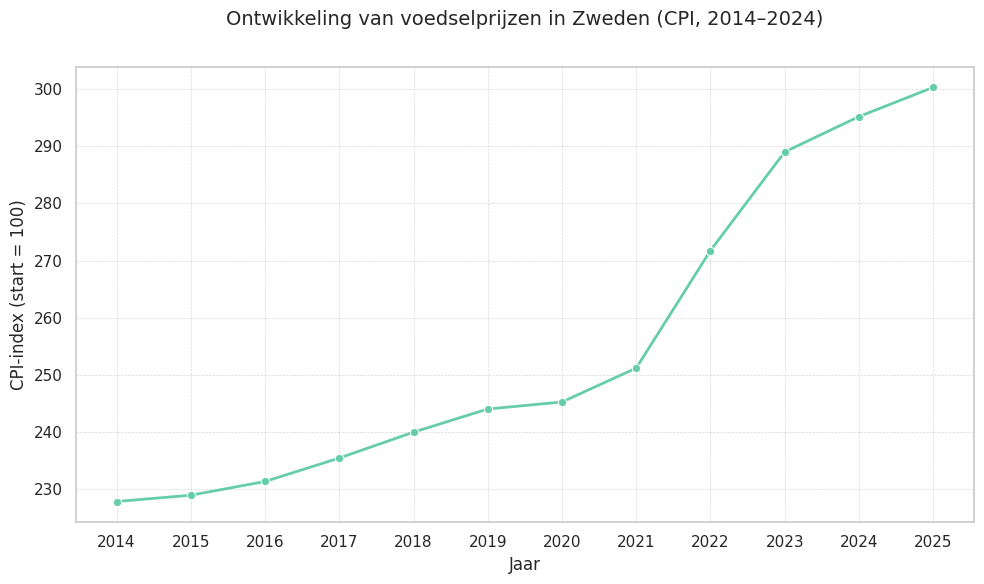

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("processed_data/CPI.csv")


df['month'] = pd.to_datetime(df['month'].str.replace('M', '-'), format='%Y-%m')
df = df.sort_values('month')


df['monthly_change'] = df['DATA']
df['cpi_index'] = 100.0
for i in range(1, len(df)):
    prev = df.loc[i-1, 'cpi_index']
    change = df.loc[i, 'monthly_change']
    df.loc[i, 'cpi_index'] = prev * (1 + change / 100)


df['year'] = df['month'].dt.year
yearly_cpi = df.groupby('year')['cpi_index'].mean().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))


sns.lineplot(data=yearly_cpi, x='year', y='cpi_index',
             marker='o', linewidth=2, color='#66CDAA', ax=ax)


plt.title("Ontwikkeling van voedselprijzen in Zweden (CPI, 2014–2024)",
          fontsize=14, pad=30)
plt.xlabel("Jaar")
plt.ylabel("CPI-index (start = 100)")
plt.xticks(yearly_cpi['year'])


ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.subplots_adjust(top=0.88)
plt.tight_layout()

plt.show()

De grafiek toont de ontwikkeling van het CPI (consumer price index) tussen 2014 en 2024 voor Zweden. Om een duidelijker beeld te krijgen van de procentuele verandering is er als startwaarde 100 genomen.Van 2014 tot 2020 was er een geleidelijke stijging van voedselprijzen. Dit wijst op een redelijk stabiele markt. 

Vanaf 2021 is er duidelijk een verandering te zien. De prijzen stijgen sneller dan ervoor. Deze grote stijging valt samen met de nasleep van COVID pandemie. De stekte stijging tussen 2021 en 2023 illusteert een belangrijke verandering van betaalbaarheid. 

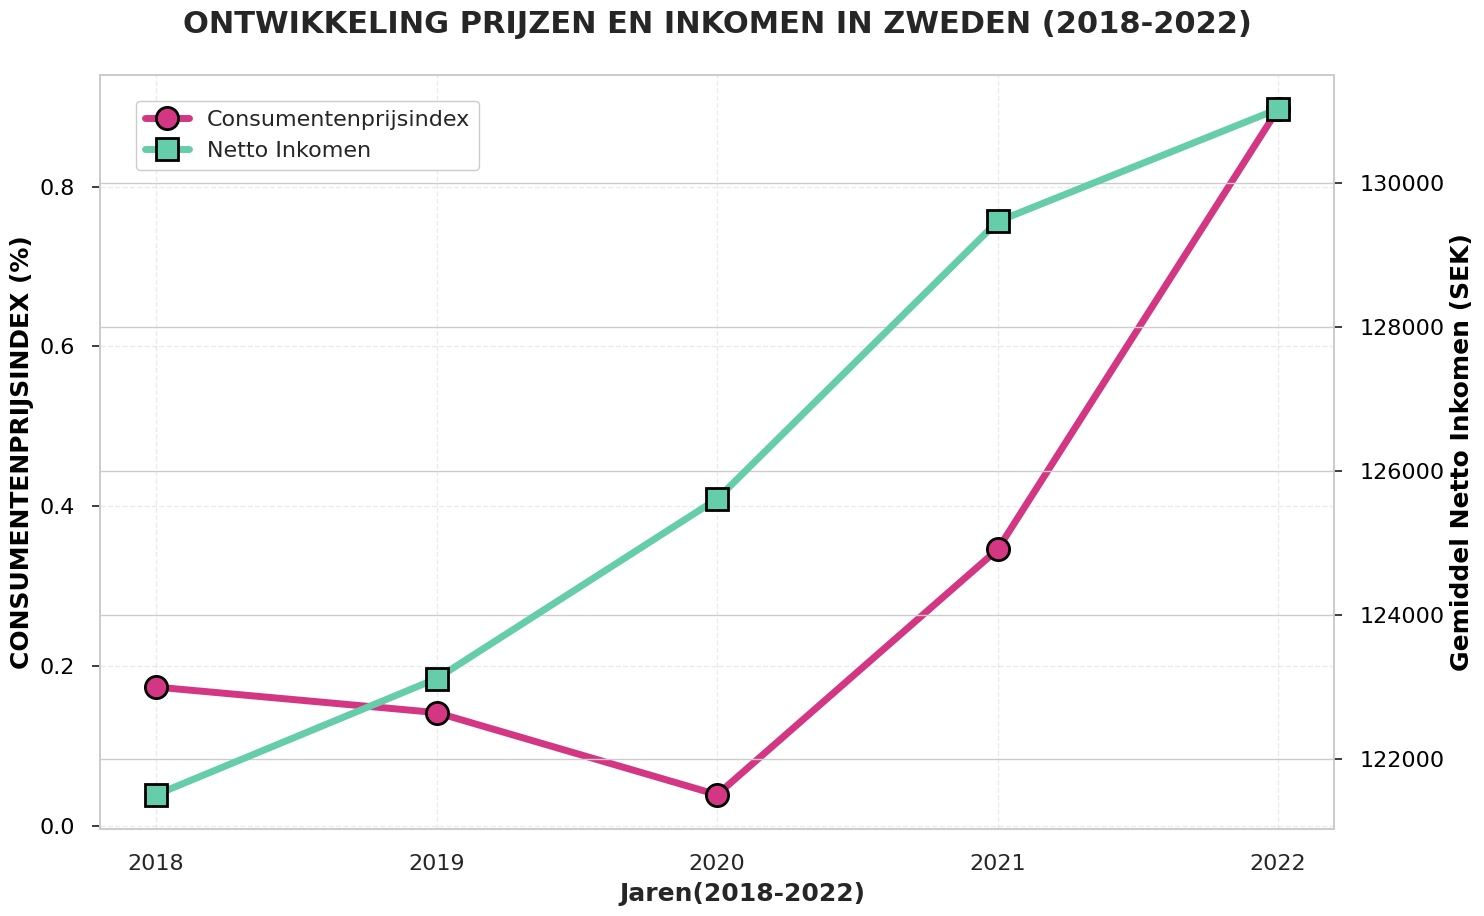

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad de verwerkte datasets
df_CPI = pd.read_csv('processed_data/CPI.csv')  
df_income = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

# Verwerk data
df_CPI['Year'] = df_CPI['month'].str.extract(r'(\d{4})').astype(int)
avg_cpi_per_year = df_CPI.groupby('Year')['DATA'].mean()
avg_income_per_year = df_income.groupby('TIME_PERIOD')['OBS_VALUE'].mean()

# Filter voor 2018-2022
years_range = range(2018, 2023)
avg_cpi_per_year = avg_cpi_per_year[avg_cpi_per_year.index.isin(years_range)]
avg_income_per_year = avg_income_per_year[avg_income_per_year.index.isin(years_range)]

# Maak de visualisatie
plt.figure(figsize=(15, 9))

# CPI (rode lijn)
ax1 = plt.gca()
color = '#d33682'
ax1.set_xlabel('', fontsize=0)  # Verwijder x-as label
ax1.set_ylabel('CONSUMENTENPRIJSINDEX (%)', 
              color='black', fontsize=18, fontweight='bold', linespacing=1.8)
price_line = ax1.plot(avg_cpi_per_year.index, avg_cpi_per_year.values, 
                     'o-', color=color, linewidth=5, markersize=16,
                     markeredgecolor='black', markeredgewidth=2, 
                     label='Consumentenprijsindex')[0]

# Grotere tick labels
ax1.tick_params(axis='y', labelcolor='black', labelsize=16, pad=12)
ax1.set_xticks(list(years_range))
ax1.tick_params(axis='x', labelsize=16, pad=12)

# Netto inkomen (blauwe lijn)
ax2 = ax1.twinx()
color = '#66CDAA'
ax2.set_ylabel('Gemiddel Netto Inkomen (SEK)', 
              color='black', fontsize=18, fontweight='bold', linespacing=1.8)
income_line = ax2.plot(avg_income_per_year.index, avg_income_per_year.values, 
                      's-', color=color, linewidth=5, markersize=16,
                      markeredgecolor='black', markeredgewidth=2, 
                      label='Netto Inkomen')[0]
ax2.tick_params(axis='y', labelcolor='black', labelsize=16, pad=12)

# Titel
plt.title('ONTWIKKELING PRIJZEN EN INKOMEN IN ZWEDEN (2018-2022)', 
          fontsize=22, pad=30, fontweight='bold')

# Legenda
lines = [price_line, income_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', fontsize=16, 
           bbox_to_anchor=(0.02, 0.98), framealpha=1)

# Grid en layout
ax1.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Voeg JAAR label toe onder de x-as
plt.figtext(0.5, -0.01, 'Jaren(2018-2022)', ha='center', fontsize=18, fontweight='bold')

plt.show()

De figuur toont de ontwikkeling van de consumentenprijsindex (CPI) en het gemiddelde netto inkomen in Zweden over de periode van 2018 tot en met 2022. Uit de grafiek blijkt dat de CPI tussen 2018 en 2020 licht is gedaald, wat duidt op een periode van stabiele of zelfs iets lagere prijzen. Vanaf 2020 is echter een duidelijke stijging te zien: in 2021 neemt de CPI weer toe, en deze stijging zet door in 2022.

Het gemiddelde netto inkomen laat over dezelfde periode een gestage stijging zien. Jaar na jaar neemt het inkomen iets toe, zonder sterke schommelingen. In 2022 liggen de CPI en het gemiddelde netto inkomen op visueel vergelijkbare niveaus, wat suggereert dat de prijzen en inkomens zich tegen het einde van de periode naar elkaar toe bewegen.

Het omslagpunt in 2020 is opvallen, want waar de eerste drie jaar een combinatie van stijgende inkomens en stabiele prijzen te zien is, verandert het beeld na 2020 door de hernieuwde prijsstijging. Deze ontwikkeling wijst op een veranderende economische situatie waarin de verhouding tussen prijs- en inkomensgroei opnieuw in balans moet worden gebracht.

### Belastingen en subsidies

Het netto inkomen is gestegen tussen 2014 en 2024, maar van de hogere inflatie die onstond door corona, is weinig terug te vinden in de groei van het netto loon. Daarbij komt ook dat de belastingen als onderdeel van het bruto loon in verhouding zijn gekrompen. Van 2019 naar 2020 is de persoonlijke inkomsten belasting van 57,2% naar 52,3% gegaan, tussen 2014 en 2024 een 5% punt daling [(Skatteverket via tradingeconomics)](https://tradingeconomics.com/sweden/personal-income-tax-rate).
In de grafiek hieronder kunt u zelf ontdekken hoe het netto inkomen in verhouding staat tot andere inkomste bronnen. Uit de data is af te lezen dat de belastingen (taxes) in verhouding tot het loon zijn gedaald, dat subsidies (Social Security) gelijk & danwel groter deel uitmaken van de inkomsten van een familie*. Hieruit kunnen wij opmaken dat de inflatie van de laaste jaren nog steeds niet is ingehaald door het bruto loon.

*De Zweedse overheid heeft bedrijven in kwetsbare sectoren geholpen, en ook extra financiele hulp gegeven aan kwetsbare inwoners. [(European Commission)](https://commission.europa.eu/strategy-and-policy/coronavirus-response/supporting-jobs-and-economy-during-coronavirus-pandemic/state-aid-cases/sweden_en)

<iframe src="https://iv-ki-2025.onrender.com/" width="100%" height="600px"></iframe>

Gebruik: *Selecteer een voorbeeld gezin, en klik eventueel op een staaf/jaar om dat jaar te bekijken klik nogmaals om terug te gaan.*
*Het kan 50 sec duren voordat de interactieve grafiek geladen is.*

## Perspectief 2

In [6]:
# Schrijf en maak visualisaties voor pespectief 1 hier; origineel te vinden in notebook.ipynb

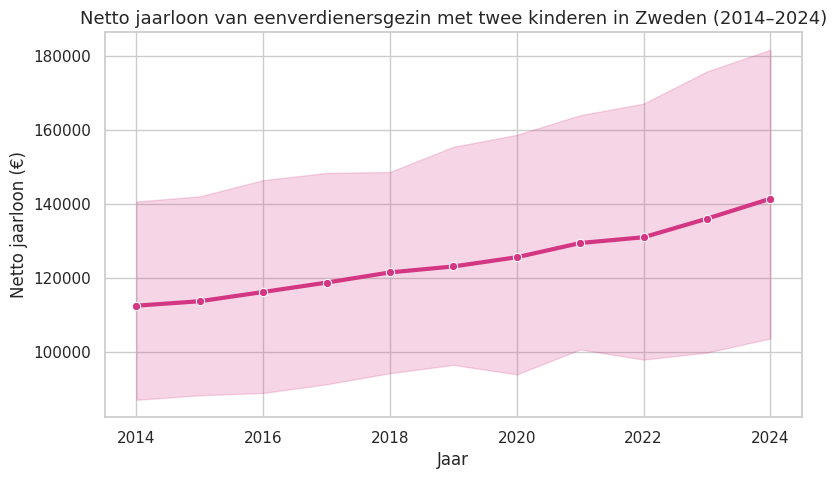

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ------------------------------------------
# DATA INLADEN
# ------------------------------------------


# Lees netto jaarloon in
earnings_df = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')


# ------------------------------------------
# PREPROCESSING NETTO JAARLOON (2014–2024)
# ------------------------------------------


earnings_df.rename(columns={
   'TIME_PERIOD': 'Jaar',
   'OBS_VALUE': 'Netto_Jaarloon'
}, inplace=True)


earnings_df = earnings_df[(earnings_df['Jaar'] >= 2014) & (earnings_df['Jaar'] <= 2024)]


# ------------------------------------------
# GRAFIEK – NETTO JAARLOON
# ------------------------------------------


sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(9, 5))
sns.lineplot(
   data=earnings_df,
   x="Jaar",
   y="Netto_Jaarloon",
   marker='o',
   linewidth=3,
   color="#d33682"  
)
plt.title("Netto jaarloon van eenverdienersgezin met twee kinderen in Zweden (2014–2024)", fontsize=13)
plt.ylabel("Netto jaarloon (€)")
plt.xlabel("Jaar")
plt.grid(True)
plt.show()

Deze grafiek toont het netto jaarloon van een eenverdienersgezin met twee kinderen in zweden tussen 2014 en 2024. De donkergroene lijn geeft het gemiddelde aan en het lichtgroene gebied geeft het minimale en maximale netto jaarloon aan. Er zijn geeft heftige dalingen of schommelingen te zien,    zelfs tijdens de pandemie jaren. Het gemiddeld netto inkomen voor dit type huishouden is dus stabiel gebleven.

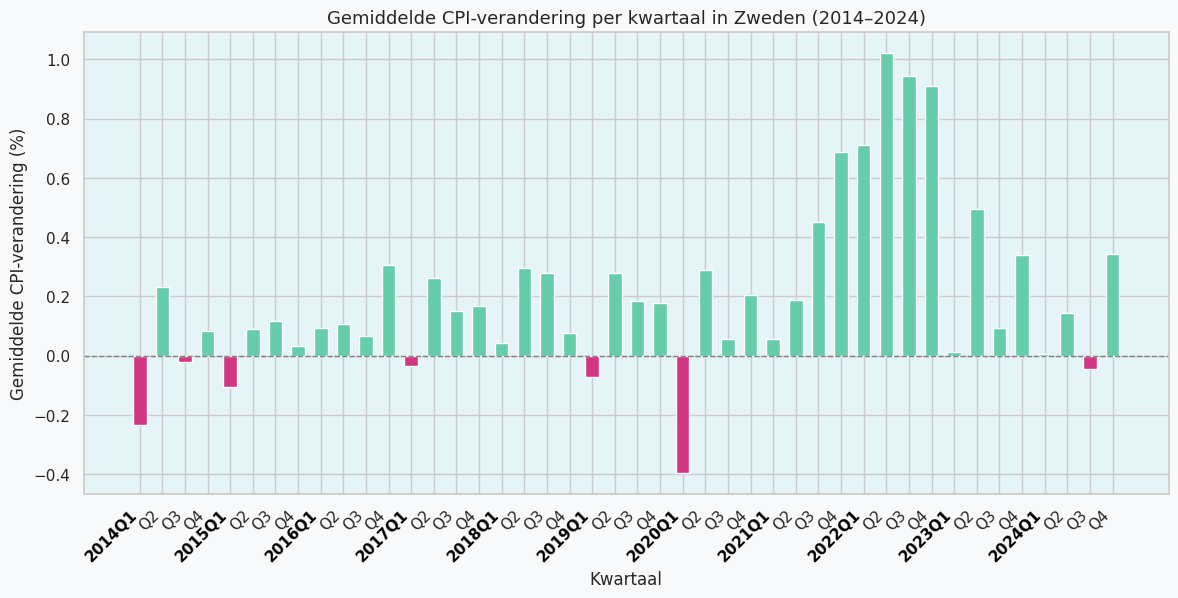

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# ------------------------------------------
# DATA INLADEN
# ------------------------------------------


cpi_df = pd.read_csv('processed_data/CPI.csv')


# ------------------------------------------
# PREPROCESSING CPI (2014–2024)
# ------------------------------------------


cpi_df['Maand'] = pd.to_datetime(cpi_df['month'].str.replace('M', '-'), format='%Y-%m')
cpi_df = cpi_df[(cpi_df['Maand'].dt.year >= 2014) & (cpi_df['Maand'].dt.year <= 2024)]
cpi_df['Kwartaal'] = cpi_df['Maand'].dt.to_period('Q').astype(str)
cpi_quarterly = cpi_df.groupby('Kwartaal')['DATA'].mean().reset_index()
cpi_quarterly.rename(columns={'DATA': 'Gemiddelde_CPI'}, inplace=True)
cpi_quarterly['Jaar'] = cpi_quarterly['Kwartaal'].str[:4].astype(int)
cpi_quarterly['Q'] = cpi_quarterly['Kwartaal'].str[-2:]


# ------------------------------------------
# LABELS MAKEN VOOR X-AS
# ------------------------------------------


labels = []
highlight_idx = []
for i in range(len(cpi_quarterly)):
   kwartaal = cpi_quarterly.iloc[i]['Q']
   jaar = cpi_quarterly.iloc[i]['Jaar']
   if kwartaal == 'Q1':
       labels.append(f'{jaar}Q1')
       highlight_idx.append(i)
   else:
       labels.append(kwartaal)


# ------------------------------------------
# KLEUREN DEFINIËREN
# ------------------------------------------


groen = '#66CDAA'  # gewenste groene kleur
rood = '#d33682'    # rood voor negatief


colors = [groen if val >= 0 else rood for val in cpi_quarterly['Gemiddelde_CPI']]


# ------------------------------------------
# GRAFIEK TEKENEN (met matplotlib bar, niet sns.barplot)
# ------------------------------------------


plt.figure(figsize=(14, 6), facecolor='#f8f9fa')  # lichte achtergrond


x = np.arange(len(cpi_quarterly))
y = cpi_quarterly['Gemiddelde_CPI']


bars = plt.bar(x, y, color=colors, width=0.6)


plt.xticks(x, labels, rotation=45, ha='right')


ax = plt.gca()


# Q1 labels vet en zwart maken
for i, label in enumerate(ax.get_xticklabels()):
   if i in highlight_idx:
       label.set_weight("bold")
       label.set_color("black")


plt.title("Gemiddelde CPI-verandering per kwartaal in Zweden (2014–2024)", fontsize=13)
plt.ylabel("Gemiddelde CPI-verandering (%)")
plt.xlabel("Kwartaal")


ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_facecolor('#e4f4f7')  # zachte achtergrond tint

plt.show()

De grafiek toont de gemiddelde CPI verandering per kwartaal in Zweden tussen 2014 en 2024. Deze verandering wordt weergeven in procenten die schommelen van -0,4% tot +1,1%. De grafiek bevat vooral positieve waardes. Er zijn geen extremene schommelingen.

Rond het eerste kwartaal van 2020, rond COVID, is er een afname van -0,4% maar dit wordt weer herstelt later rond 2022. 

In [1]:
import pandas as pd
import plotly.graph_objects as go

# Data inladen
df = pd.read_csv('processed_data/WDI_2014-2024.csv')

# Jaar-kolommen selecteren
jaar_kolommen = [col for col in df.columns if '[YR' in col]

# Omzetten naar lang formaat
df_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=jaar_kolommen,
    var_name='Year',
    value_name='Value'
)
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# ✅ Filter op de jaren 2018 t/m 2022
df_long = df_long[df_long['Year'].between(2018, 2022)]

# Nederlandse vertaling van indicatornamen
vertaal = {
    'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)': 'Extreme armoede',
    'Poverty headcount ratio at national poverty lines (% of population)': 'Nationale armoedegrens'
}
geselecteerde_series = list(vertaal.keys())

# Filter op land, series en jaar
df_poverty = df_long[
    (df_long['Country Name'] == 'Sweden') &
    (df_long['Series Name'].isin(geselecteerde_series))
].dropna(subset=['Value'])

# Vervang naar Nederlandse labels
df_poverty['Series Name'] = df_poverty['Series Name'].map(vertaal)

# Sorteer netjes
df_poverty = df_poverty.sort_values(by=['Series Name', 'Year'])

# Stijlen per serie
styles = {
    'Extreme armoede': {'color': '#d33682', 'dash': 'solid', 'symbol': 'circle'},
    'Nationale armoedegrens': {'color': '#66CDAA', 'dash': 'dash', 'symbol': 'square'}
}

# Plot maken
fig1 = go.Figure()

for name, group in df_poverty.groupby('Series Name'):
    fig1.add_trace(go.Scatter(
        x=group['Year'],
        y=group['Value'],
        name=name,
        mode='lines+markers',
        line=dict(color=styles[name]['color'], width=3, dash=styles[name]['dash']),
        marker=dict(size=10, symbol=styles[name]['symbol']),
        hovertemplate='<b>%{x}</b><br>%{y:.1f}%<extra></extra>'
    ))

# Grafiek lay-out
fig1.update_layout(
    title='<b>Figuur 1: Armoede in Zweden (2018–2022)</b>',
    xaxis=dict(title='Jaar', dtick=1),
    yaxis=dict(title='% van de bevolking', range=[0, df_poverty['Value'].max() * 1.1]),
    legend=dict(orientation="h", yanchor="bottom", y=1.02),
    height=500,
    plot_bgcolor='white'
)

fig1.show()

Het figuur laat zien hoe het percentage mensen in Zweden dat in armoede leeft zich heeft ontwikkeld tussen 2018 en 2022. Er worden twee soorten armoede weergegeven: extreme armoede (gebaseerd op een internationale grens van $3 per dag) en armoede volgens de nationale armoedegrens van Zweden.



In [2]:
import pandas as pd
import plotly.graph_objects as go

# Data voorbereiding
df_CPI = pd.read_csv('processed_data/CPI.csv')
df_CPI = df_CPI.rename(columns={'month': 'Month', 'DATA': 'Value'})
df_CPI['Year'] = df_CPI['Month'].str[:4].astype(int)
df_CPI = df_CPI[df_CPI['Year'].between(2018, 2022)]
df_CPI['Month'] = pd.to_datetime(df_CPI['Month'], format='%YM%m').dt.strftime('%b')
df_CPI['Month'] = pd.Categorical(df_CPI['Month'], 
                                categories=['Jan', 'Feb', 'Mrt', 'Apr', 'Mei', 'Jun',
                                           'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'],
                                ordered=True)

# Kleur instellen
positive_color = '#66CDAA'  # Oranje
negative_color = '#d33682'  # Blauw als contrast

# Figuur maken
fig3 = go.Figure()

for year in sorted(df_CPI['Year'].unique()):
    df_year = df_CPI[df_CPI['Year'] == year].sort_values('Month')
    
    # Per staaf de juiste kleur toewijzen
    colors = [positive_color if val >= 0 else negative_color for val in df_year['Value']]
    
    fig3.add_trace(go.Bar(
        x=df_year['Month'],
        y=df_year['Value'],
        name=str(year),
        visible=(year == 2018),
        marker_color=colors
    ))

# Jaarkiezer
buttons = []
for i, year in enumerate(sorted(df_CPI['Year'].unique())):
    visible = [False] * len(df_CPI['Year'].unique())
    visible[i] = True
    buttons.append(
        dict(label=str(year),
             method="update",
             args=[{"visible": visible}])  # Geen titel hier!
    )

# Layout
fig3.update_layout(
    title='<b>CPI per maand</b>',
    xaxis=dict(title='Maand'),
    yaxis=dict(title='CPI verandering (%)'),
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "active": 0,
        "x": 0.3,
        "y": 1.15
    }],
    height=600,
    plot_bgcolor='white'
)

fig3.show()



Het figuur laat de maandelijkse veranderingen in de Consumentenprijsindex (CPI) zien voor de jaren 2018 tot en met 2022. De CPI geeft weer hoe de gemiddelde prijzen van goederen en diensten voor consumenten zijn veranderd ten opzichte van de maand ervoor.
Elke staaf in het figuur vertegenwoordigt de procentuele verandering in één maand. Als de staaf oranje is, betekent dit dat de prijzen in die maand zijn gestegen. Blauwe staven geven juist aan dat de prijzen zijn gedaald.
Boven het figuur kan u de jaren selecteren.

In [3]:
import plotly.graph_objects as go
import numpy as np

# Filter data (ga ervan uit dat OBS_VALUE al in SEK is)
df_filtered = df_income[df_income['TIME_PERIOD'].between(2018, 2022)]

# Y-as instellingen in SEK
y_tickvals = [100, 5000, 10000, 25000, 50000, 75000, 100000, 
              250000, 500000, 750000, 1000000, 1500000]
y_ticktext = ['0', '5k', '10k', '25k', '50k', '75k', '100k', 
              '250k', '500k', '750k', '1M', '1.5M']

# Figuur maken
fig4 = go.Figure()

for year in sorted(df_filtered['TIME_PERIOD'].unique()):
    df_year = df_filtered[df_filtered['TIME_PERIOD'] == year]
    y_values = np.where(df_year['OBS_VALUE'] == 0, 100, df_year['OBS_VALUE'])
    fig4.add_trace(go.Box(
        y=y_values,
        name='',
        visible=(year == 2022),
        boxpoints=False,
        marker_color='#59A14F',
        line_color='#d33682',
        width=0.5,
        hoverinfo='y',
        hovertemplate='%{y:,.2f} kr<extra></extra>'  # Tooltip met SEK
    ))

# Layout met Nederlandse labels
fig4.update_layout(
    title=dict(
        text="<b>Inkomensverdeling</b>",  # Nederlandse titel
        x=0.05,
        xanchor='left',
        y=0.95,
        font=dict(size=18, family='Arial')
    ),
    yaxis=dict(
        title='Netto inkomen (SEK)',
        tickvals=y_tickvals,
        ticktext=y_ticktext,
        type='log',
        range=[np.log10(50), np.log10(2000000)],
        gridcolor='rgba(200,200,200,0.3)',
        zeroline=False,
        title_font=dict(size=14)
    ),
    xaxis=dict(
        showticklabels=False,
        showgrid=False,
        range=[-0.5, 0.5]
    ),
    updatemenus=[{
        "buttons": [dict(label=str(year),
                      method="update",
                      args=[{"visible": [y==year for y in sorted(df_filtered['TIME_PERIOD'].unique())]}])
                 for year in sorted(df_filtered['TIME_PERIOD'].unique())],
        "direction": "down",
        "x": 0.5,
        "y": 1.15,
        "xanchor": "center",
        "yanchor": "top",
        "bgcolor": "rgba(255,255,255,0.8)"
    }],
    height=650,
    margin=dict(l=80, r=80, t=120, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Nul-weergave
fig4.add_annotation(
    x=-0.5, y=100, xref='x', yref='y',
    text='0', showarrow=False,
    font=dict(color='black'),
    xanchor='right'
)

fig4.show()

NameError: name 'df_income' is not defined

Deze grafiek toont hoe inkomens verdeeld waren onder Zweden van 2018 tot 2022. De box geeft aan wat het inkomen van de meeste mensen was, de dikke lijn in het midden is het gemiddelde. De lijntjes boven en onder het vak laten de maximaal en de minimaal zien. Omdat sommigen veel meer verdienden dan anderen, gebruiken we een speciale schaal  zodat je alle verschillen goed kunt zien. En met het keuzemenu bovenaan kan je verschillende jaren selecteren.

*Inkomste bronnen* Gebruik: *Selecteer een voorbeeld gezin, en klik daarna eventueel op een jaar om dat jaar specifiek te bekijken, klik nogmaals om terug te gaan.*